In [165]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


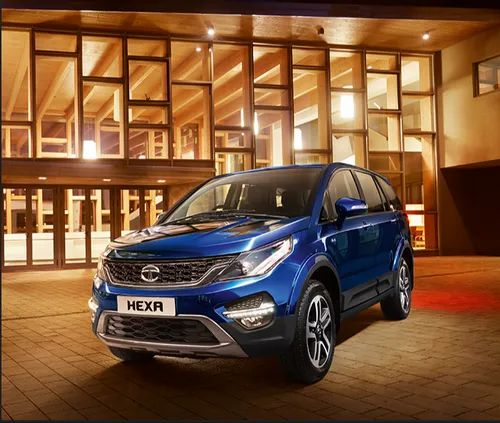

In [166]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/motosecarros/testes/carro/Car (4).png')

In [167]:
import tensorflow as tf

In [168]:
import keras as K

In [169]:
from keras.models import Sequential

from keras.layers import Conv2D

from keras.layers import MaxPooling2D

from keras.layers import Flatten

from keras.layers import Dense

In [170]:
classifier = Sequential()

In [171]:
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

In [172]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [173]:
classifier.add(Conv2D(32, (3, 3), activation= 'relu'))


In [174]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [175]:
classifier.add(Flatten())

In [176]:
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [177]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [178]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,

                                  shear_range = 0.2,

                                  zoom_range = 0.2,

                                  horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255)

In [179]:
training_set = train_datagen.flow_from_directory(directory=r'/content/drive/MyDrive/motosecarros/testes',

                                                target_size = (64, 64),

                                                batch_size = 32,
                                                 
                                                class_mode = 'binary')

validation_set = validation_datagen.flow_from_directory(directory=r'/content/drive/MyDrive/motosecarros/validacao',

                                                        target_size = (64, 64),

                                                        batch_size = 32,

                                                        class_mode = 'binary')

Found 2800 images belonging to 2 classes.
Found 1200 images belonging to 2 classes.


In [180]:
classifier.fit_generator(training_set,

steps_per_epoch = 10,

epochs = 10,

validation_data = validation_set,

validation_steps = 10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/10
10/10 [==============================] - 7s 547ms/step - loss: 0.7682 - accuracy: 0.5063 - val_loss: 0.6840 - val_accuracy: 0.4781
Epoch 2/10
10/10 [==============================] - 6s 654ms/step - loss: 0.6724 - accuracy: 0.5813 - val_loss: 0.6547 - val_accuracy: 0.6719
Epoch 3/10
10/10 [==============================] - 5s 482ms/step - loss: 0.6250 - accuracy: 0.7125 - val_loss: 0.6111 - val_accuracy: 0.6500
Epoch 4/10
10/10 [==============================] - 6s 675ms/step - loss: 0.5455 - accuracy: 0.7531 - val_loss: 0.7914 - val_accuracy: 0.5500
Epoch 5/10
10/10 [==============================] - 5s 514ms/step - loss: 0.5465 - accuracy: 0.7344 - val_loss: 0.5552 - val_accuracy: 0.7063
Epoch 6/10
10/10 [==============================] - 4s 455ms/step - loss: 0.4944 - accuracy: 0.7594 - val_loss: 0.4852 - val_accuracy: 0.7781
Epoch 7/10
10/10 [==============================] - 5s 464ms/step - loss: 0.4403 - accuracy: 0.8281 - val_loss: 0.3962 - val_accuracy: 0.8313
Epoch 

1/1 [==============================] - 0s 22ms/step


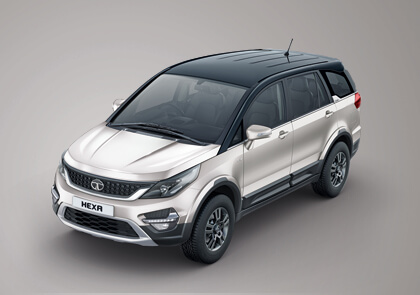

In [184]:
import numpy as np

from keras.utils import load_img, img_to_array

test_image = load_img('/content/drive/MyDrive/motosecarros/testes/carro/Car (6).jpg', target_size = (64, 64))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'Motocicleta'
else:
    prediction = 'Carro'

Image(filename='/content/drive/MyDrive/motosecarros/testes/carro/Car (6).jpg')

In [185]:
prediction

'Carro'